In [1]:
import pandas as pd
import numpy as np
import urllib.request
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal as ps

In [2]:
df = pd.read_csv("df_10_15.csv", index_col=0)
df.head()

,incident_zip,Water System2010,Sewer2010,Dirty Conditions2010,Noise2010,Sanitation Condition2010,Missed Collection (All Materials)2010,Snow2010,Derelict Vehicles2010,Air Quality2010,...,Litter Basket / Request2015,Vacant Lot2015,Lead2015,Hazardous Materials2015,Industrial Waste2015,Overflowing Litter Baskets2015,Recycling Enforcement2015,Asbestos2015,Smoking2015,sum2015
0,11208,1059.0,462.0,307.0,69.0,338.0,139.0,225.0,165.0,37.0,...,29.0,85.0,12.0,32.0,8.0,9.0,1.0,28.0,7.0,3638.0
1,10031,1045.0,68.0,150.0,164.0,53.0,11.0,30.0,2.0,40.0,...,9.0,2.0,13.0,15.0,6.0,2.0,10.0,15.0,43.0,1772.0
2,10040,895.0,19.0,66.0,162.0,36.0,11.0,30.0,7.0,73.0,...,12.0,2.0,8.0,9.0,1.0,4.0,1.0,6.0,11.0,1248.0
3,10314,858.0,784.0,353.0,220.0,388.0,517.0,283.0,124.0,30.0,...,16.0,32.0,13.0,37.0,27.0,59.0,1.0,14.0,11.0,4231.0
4,10468,809.0,150.0,260.0,58.0,87.0,24.0,27.0,10.0,44.0,...,13.0,10.0,3.0,17.0,1.0,5.0,5.0,13.0,200.0,1562.0


In [3]:
collist = df.columns.tolist()
templist = collist[1:22]
typelist = []
for i in range(21):
    typelist.append(templist[i][:-4]+" change")
    df[templist[i][:-4]+" change"] = (df.iloc[:,21+1+i]-df.iloc[:,1+i])/df.iloc[:,1+i]
print("Columns for mapping:")
typelist

Columns for mapping:


['Water System change',
 'Sewer change',
 'Dirty Conditions change',
 'Noise change',
 'Sanitation Condition change',
 'Missed Collection (All Materials) change',
 'Snow change',
 'Derelict Vehicles change',
 'Air Quality change',
 'Other Enforcement change',
 'Water Conservation change',
 'Litter Basket / Request change',
 'Vacant Lot change',
 'Lead change',
 'Hazardous Materials change',
 'Industrial Waste change',
 'Overflowing Litter Baskets change',
 'Recycling Enforcement change',
 'Asbestos change',
 'Smoking change',
 'sum change']

# for map

In [4]:
df_new = df.drop(df.columns[1:43], axis=1)
df_new['incident_zip'] = df_new['incident_zip'].astype(str)
df_new.head()

,incident_zip,Water System change,Sewer change,Dirty Conditions change,Noise change,Sanitation Condition change,Missed Collection (All Materials) change,Snow change,Derelict Vehicles change,Air Quality change,...,Litter Basket / Request change,Vacant Lot change,Lead change,Hazardous Materials change,Industrial Waste change,Overflowing Litter Baskets change,Recycling Enforcement change,Asbestos change,Smoking change,sum change
0,11208,-0.162417,-0.173160,0.837134,0.782609,0.458580,0.755396,-0.560000,1.806061,-0.081081,...,0.450000,3.250000,0.714286,1.461538,-0.111111,2.000000,-0.941176,4.600000,0.750000,0.221625
1,10031,-0.211483,-0.323529,0.026667,1.365854,-0.018868,1.454545,-0.100000,5.500000,-0.050000,...,0.800000,1.000000,1.166667,0.500000,0.200000,-0.600000,-0.285714,0.250000,6.166667,0.071342
2,10040,-0.262570,1.315789,0.393939,0.185185,0.861111,-0.454545,-0.266667,0.571429,-0.164384,...,2.000000,1.000000,-0.200000,3.500000,-0.500000,0.333333,-0.857143,-0.142857,1.750000,-0.078287
3,10314,0.039627,-0.286990,0.249292,0.027273,0.190722,0.363636,0.056537,-0.193548,0.366667,...,-0.652174,1.909091,-0.434783,0.370370,-0.129032,1.681818,-0.875000,2.500000,10.000000,0.094696
4,10468,-0.270705,-0.380000,-0.338462,1.086207,0.229885,0.500000,0.666667,3.600000,-0.204545,...,-0.409091,19.000000,-0.625000,2.400000,-0.833333,0.250000,9.000000,0.625000,49.000000,0.005795


In [5]:
#normalize the change rate

#cols_to_norm = df_new.columns[1:]
#df_new[cols_to_norm] = df_new[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))
#df_new.head()

In [6]:
urllib.request.urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip', "file.gz")
os.system("mv " + "file.gz " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/file.gz -d " + os.getenv("PUIDATA") + "/zipcode")
nyc = gpd.read_file(os.getenv("PUIDATA") + "/zipcode" + "/ZIP_CODE_040114.shp")
nyc.drop(['BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN'], axis=1, inplace=True)

nyc = nyc.merge(df_new, left_on='ZIPCODE', right_on='incident_zip')
nyc.drop(['incident_zip'], axis=1, inplace=True)

nycmap = gpd.GeoDataFrame(nyc)

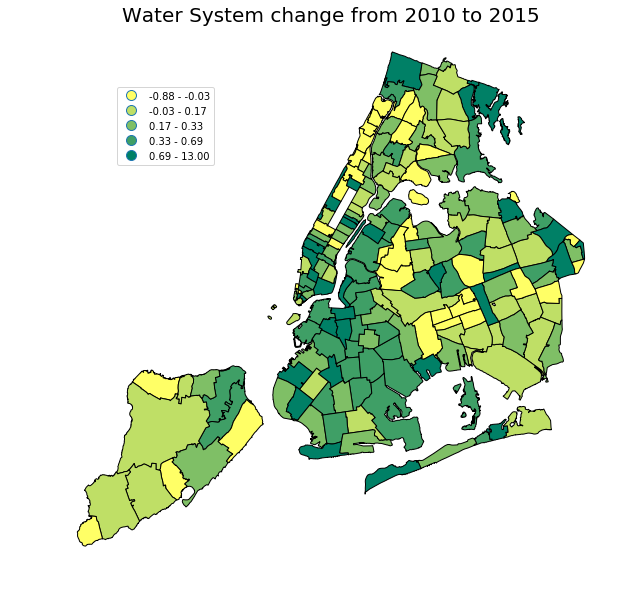

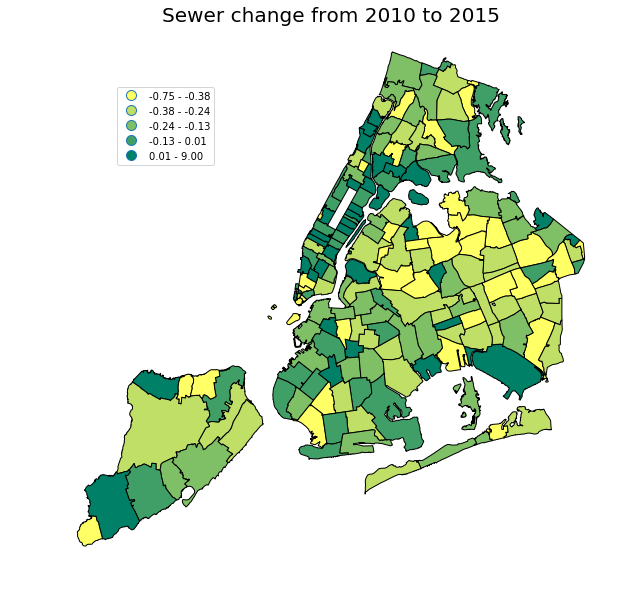

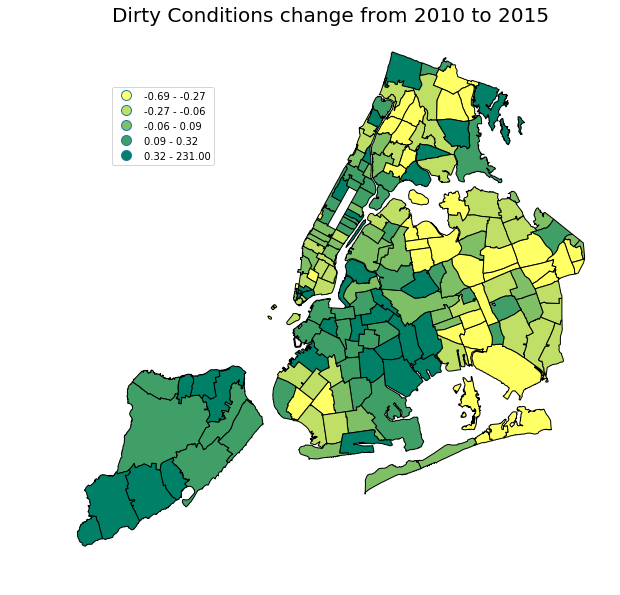

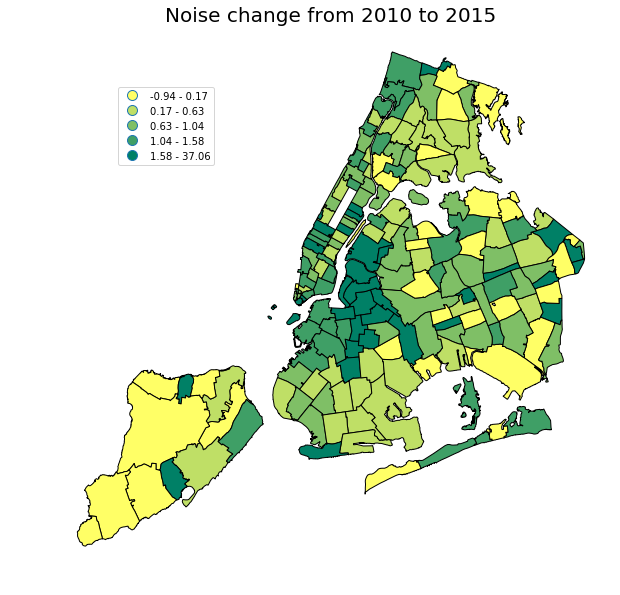

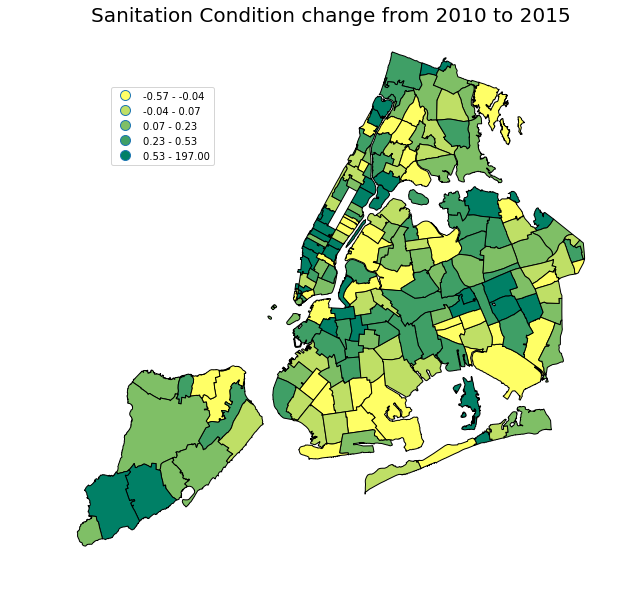

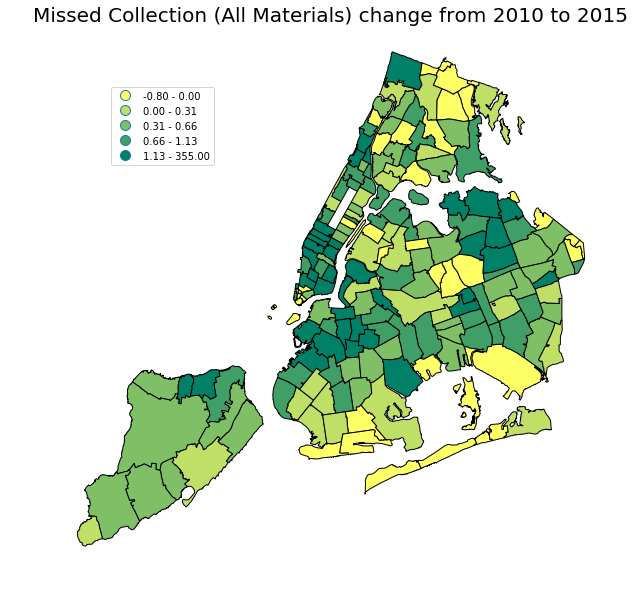

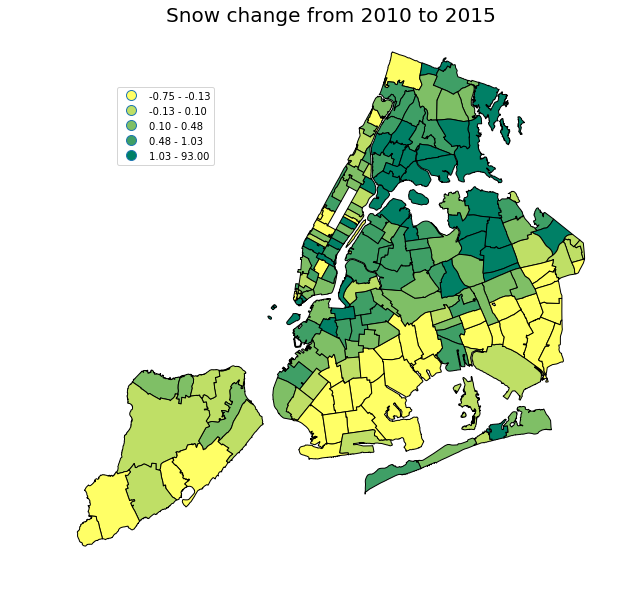

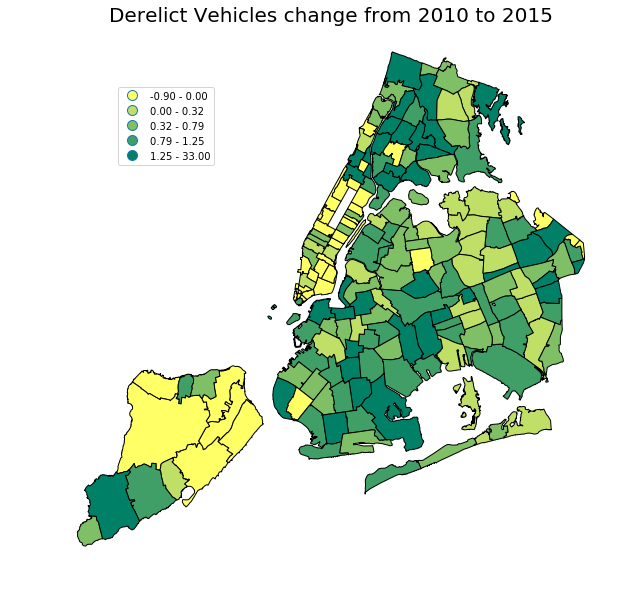

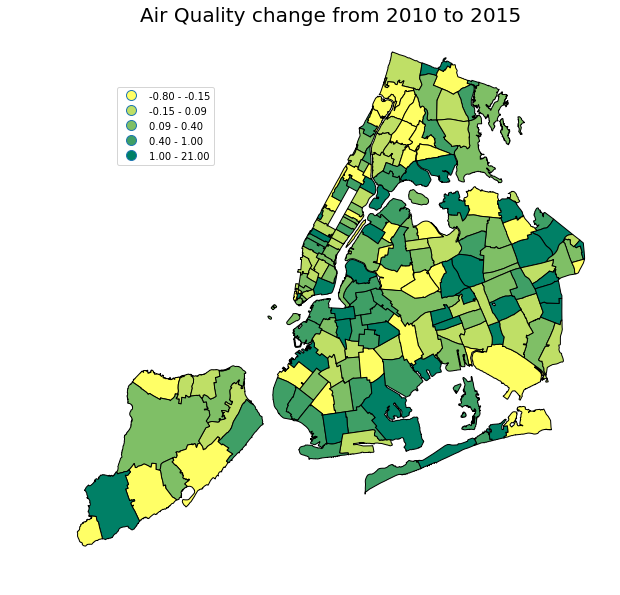

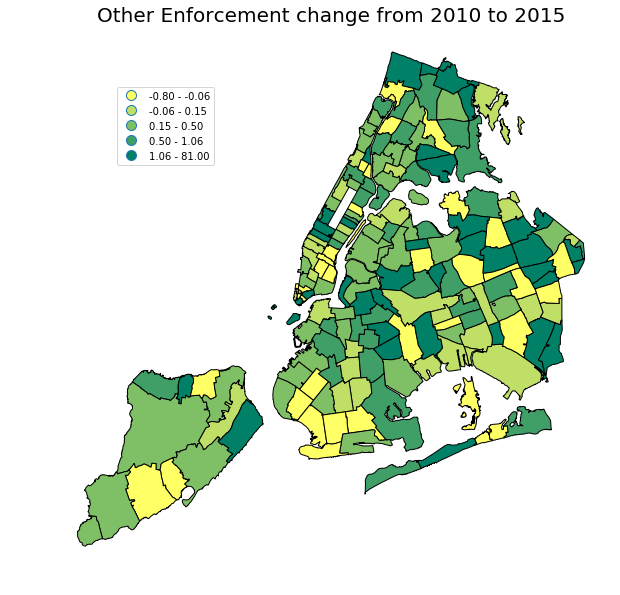

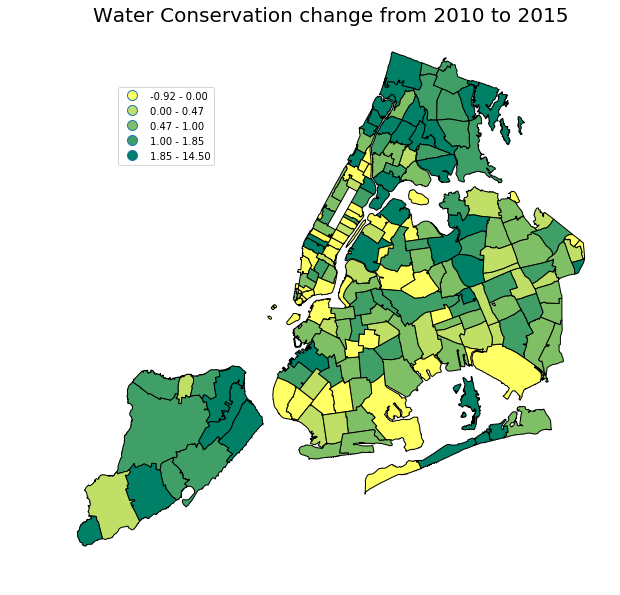

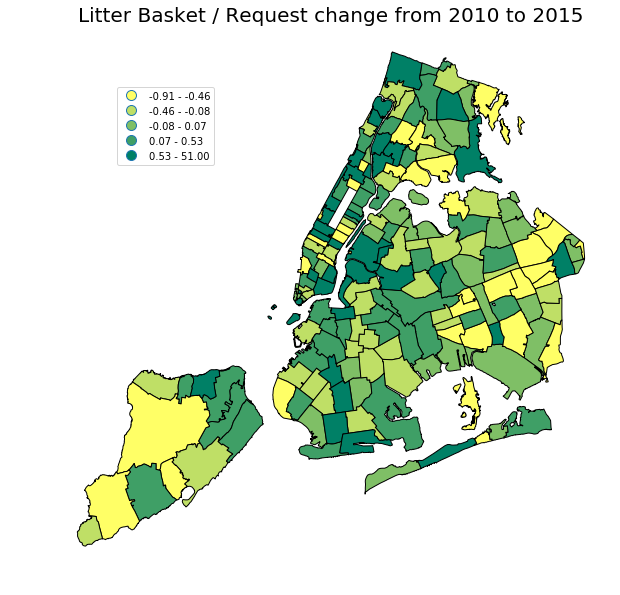

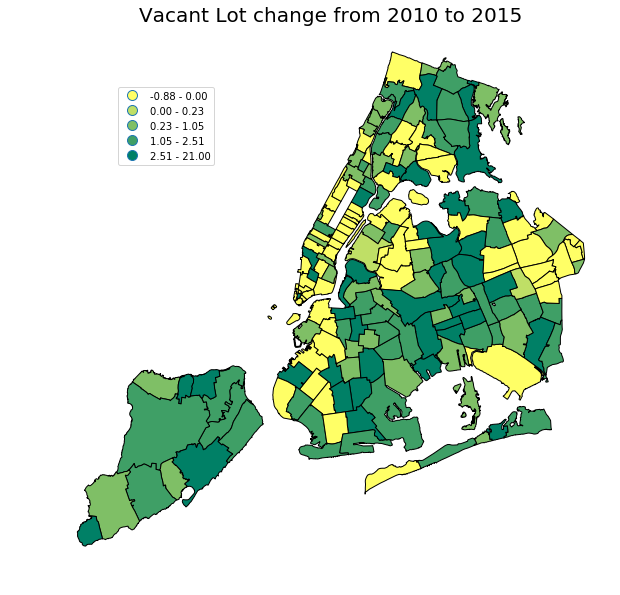

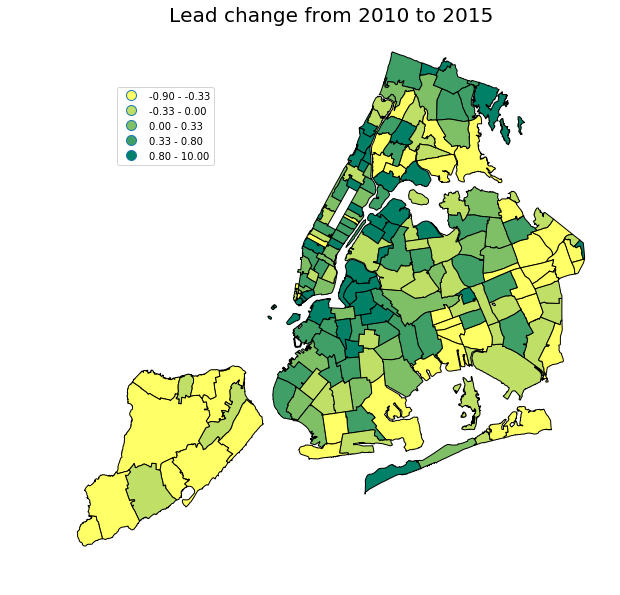

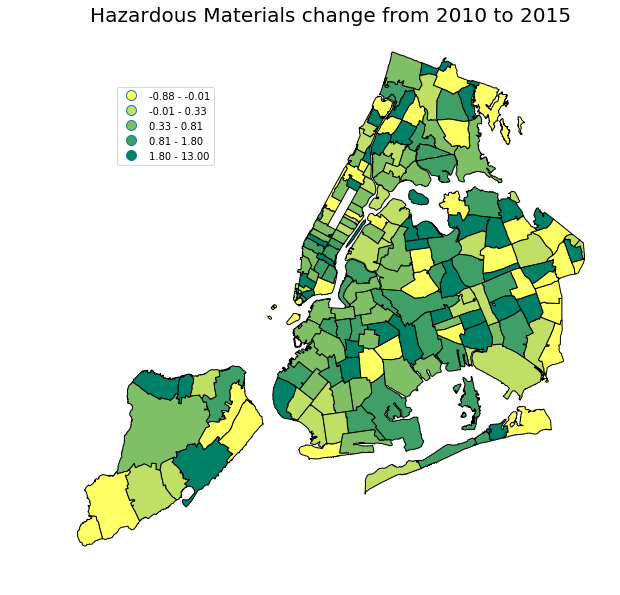

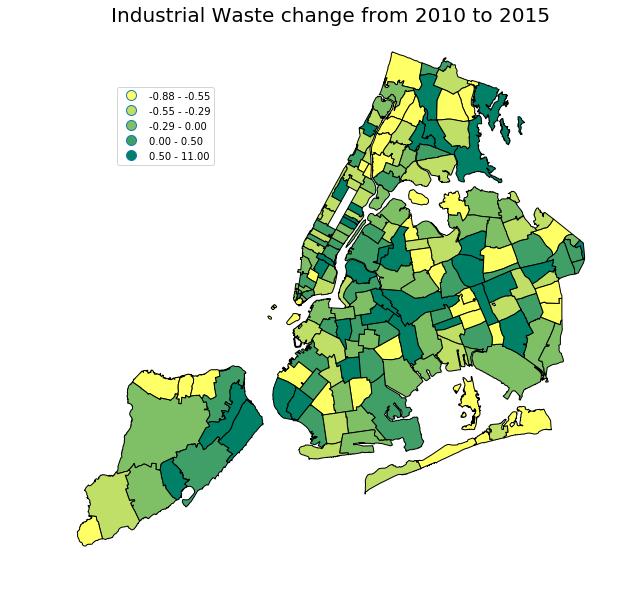

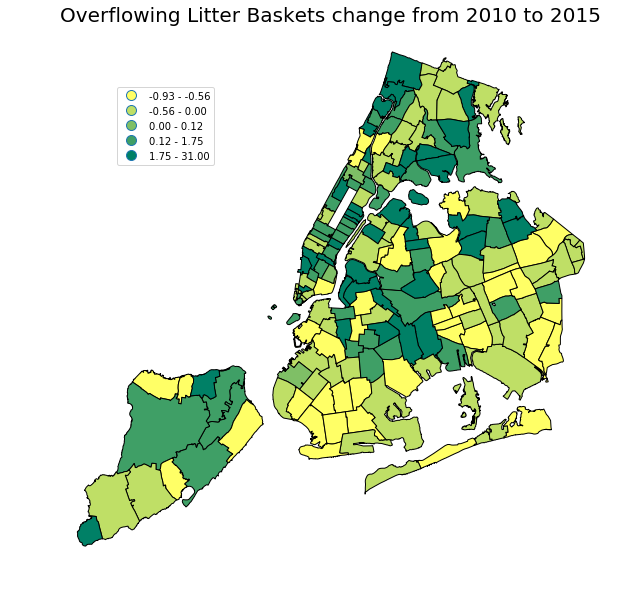

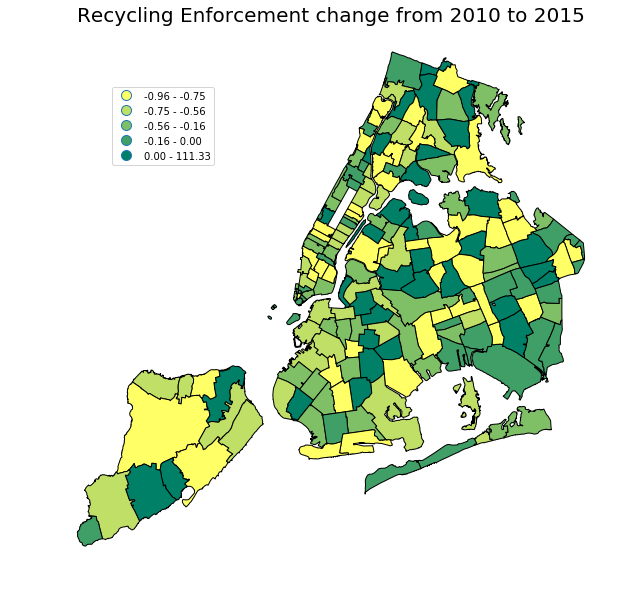

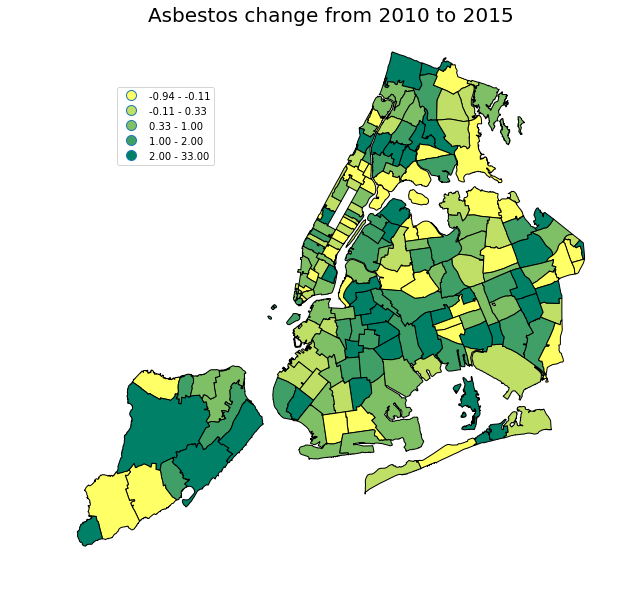

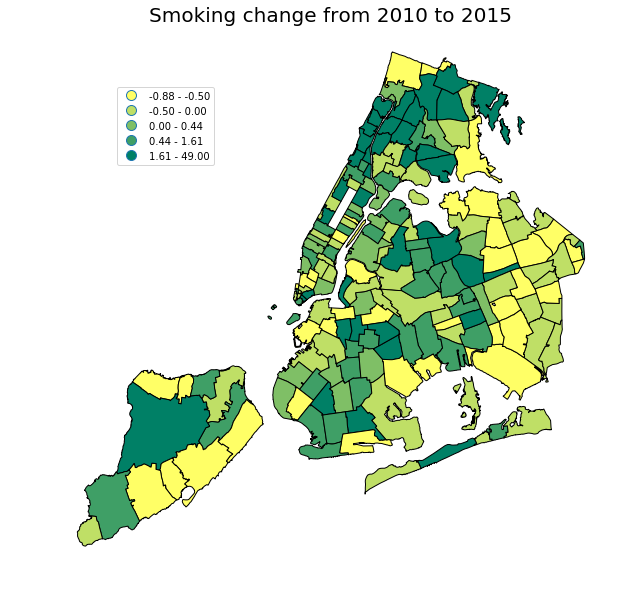

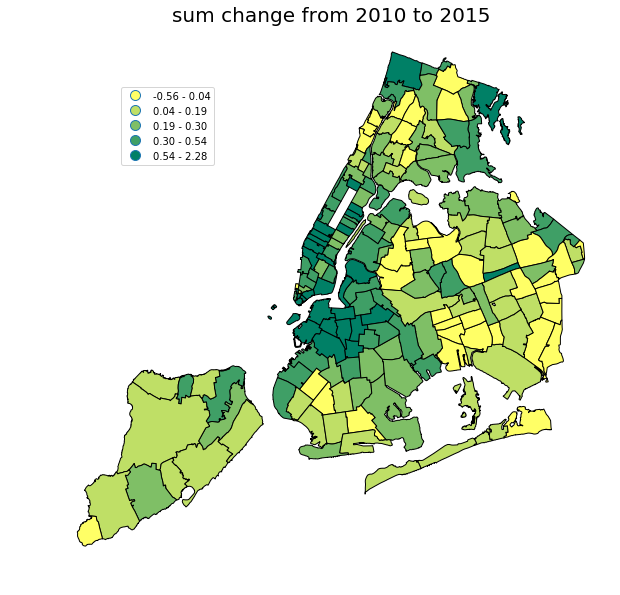

In [7]:
for i,name in enumerate(typelist):
    fig, ax = plt.subplots(figsize=(10,10))
    nycmap.plot(ax=ax, column=name, cmap='summer_r', alpha=1, edgecolor="black", linewidth=1,
               scheme="QUANTILES", legend=True, k=5) 
    ax.set_title(name+" from 2010 to 2015", fontsize=20)
    ax.set_axis_off()
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((0.1, 0.7, 0.2, 0.2))
    plt.show()